In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime  

from sklearn.ensemble import AdaBoostClassifier


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                   
from sklearn.metrics import confusion_matrix, classification_report
                                  
import warnings   
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [263]:
employee = pd.read_csv(r"C:\Users\OMKAR\Desktop\New folder\tenzai\Employee Attrition.csv")
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,...,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,...,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,...,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,...,Very High,80,0,17,3,Good,9,6,0,8


In [264]:
employee.shape

(1470, 35)

In [265]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [266]:
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [267]:
def summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;

In [268]:
summary(employee)

,index,Missing Data,Unique Data,Data Types
0,Age,0,43,int64
1,Attrition,0,2,object
2,BusinessTravel,0,3,object
3,DailyRate,0,886,int64
4,Department,0,3,object
5,DistanceFromHome,0,29,int64
6,Education,0,5,object
7,EducationField,0,6,object
8,EmployeeCount,0,1,int64
9,EmployeeNumber,0,1470,int64


In [269]:
print(employee.EmployeeCount.unique())
print(employee.EmployeeNumber.unique())
print(employee.Over18.unique())
print(employee.StandardHours.unique())

[1]
[   1    2    4 ... 2064 2065 2068]
['Y']
[80]


In [270]:
employee = employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Seprating  Object & number variables

In [271]:
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5
1,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7
2,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0
3,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0
4,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2


<AxesSubplot:>

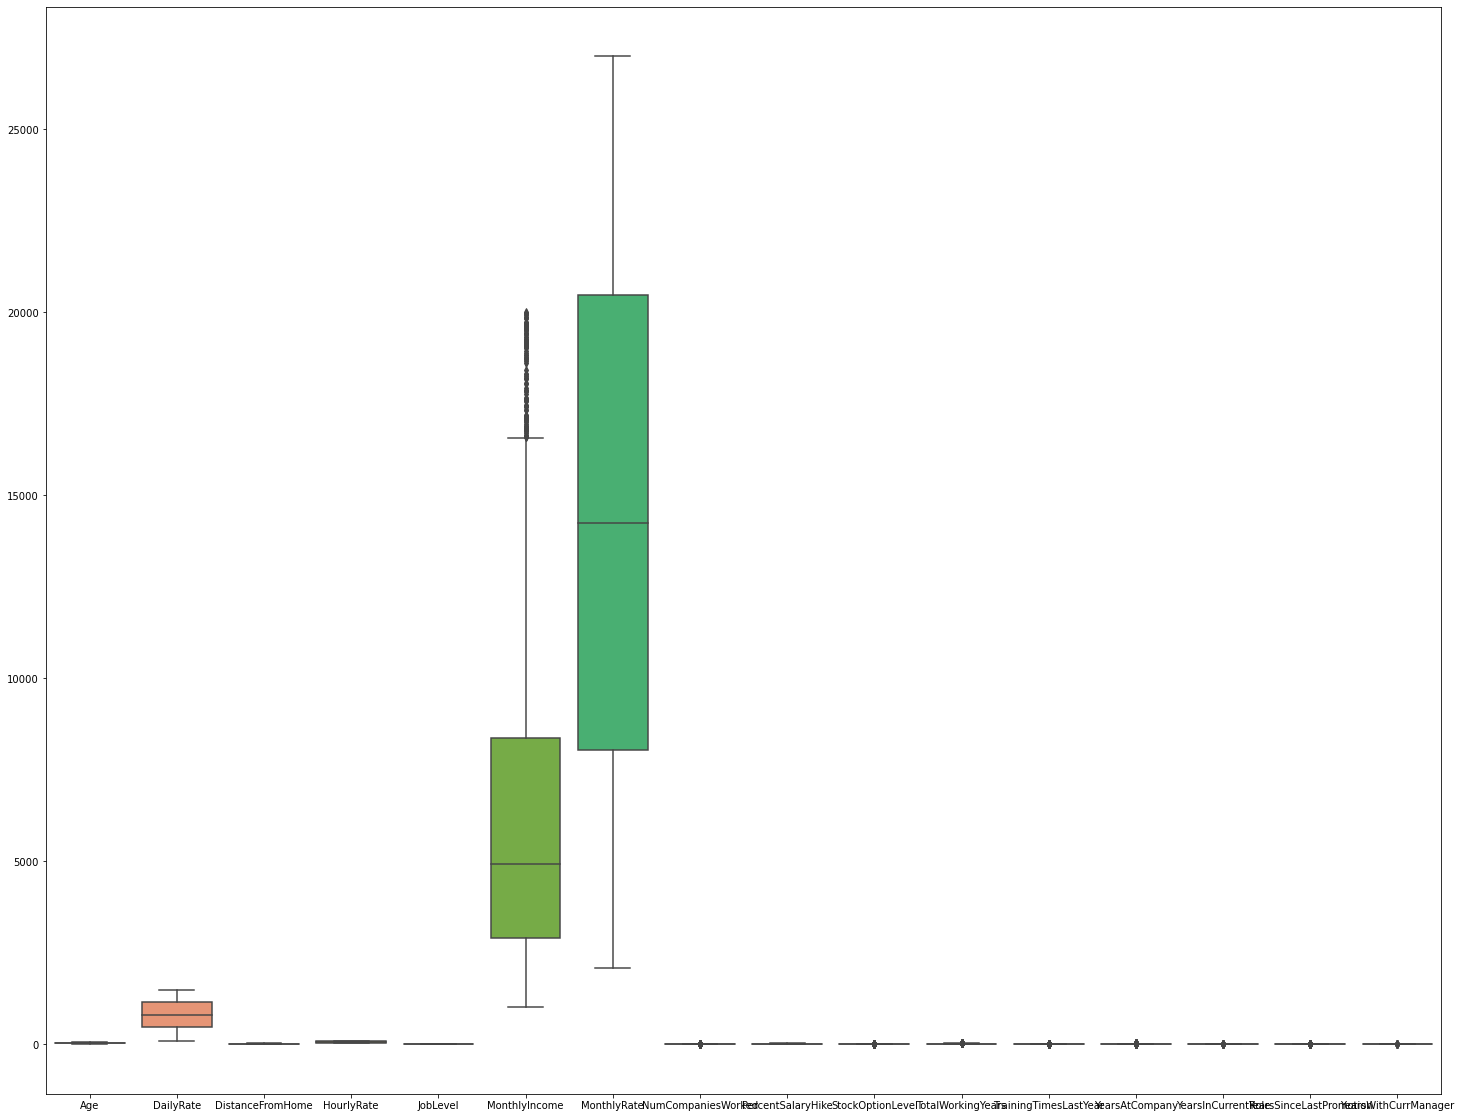

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[25,20])
sns.boxplot(data=employee_num)

# Treating Outliers

In [273]:
q1 = employee_num['MonthlyIncome'].quantile(0.25)
q3 = employee_num['MonthlyIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit


16581.0

In [275]:
employee_num['MonthlyIncome']=np.where(employee_num['MonthlyIncome'] > upper_limit,upper_limit,employee_num['MonthlyIncome']) 

<AxesSubplot:>

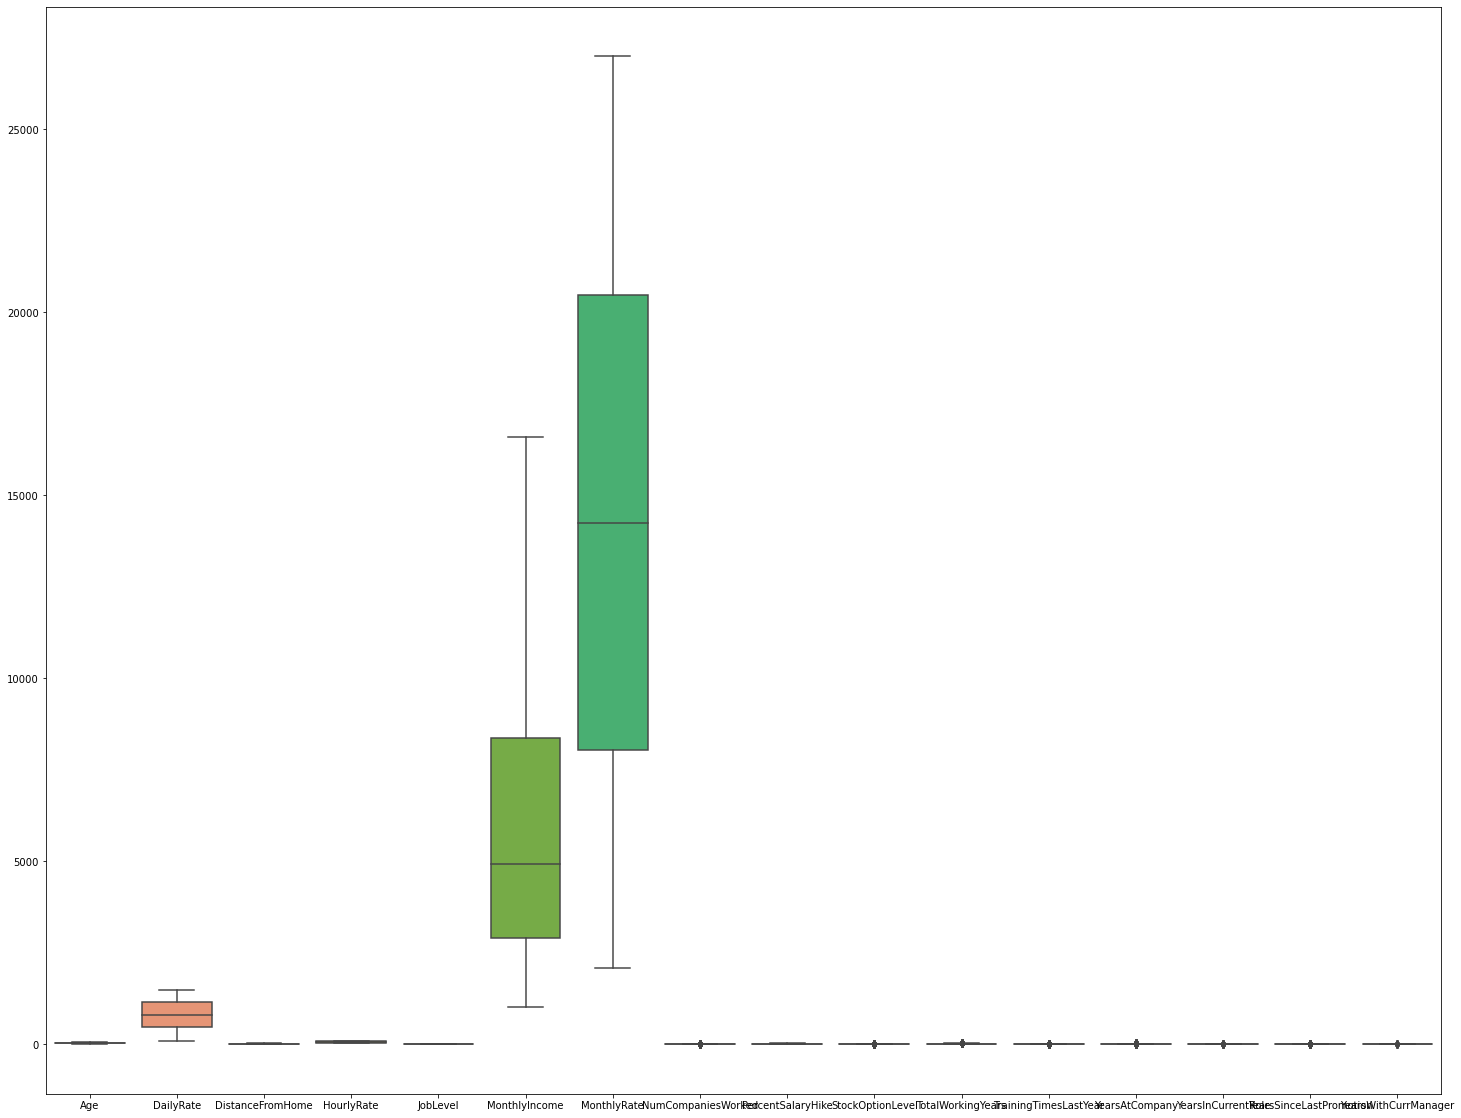

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[25,20])
sns.boxplot(data=employee_num)

In [277]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head()


,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,No,Excellent,Very High,Better


# Label Encoding

In [278]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,1,2,2,2,1,2,0,0,7,3,2,1,0,1,0
1,0,1,1,1,1,0,1,2,6,2,1,0,1,3,2
2,1,2,1,2,4,3,1,2,2,0,2,1,0,2,2
3,0,1,1,4,1,3,0,0,6,0,1,1,0,0,2
4,0,2,1,1,3,1,1,0,2,2,1,0,0,3,2


In [279]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

employee_combined.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,41,1102,1,94,2,5993.0,19479,8,11,0,...,2,0,0,7,3,2,1,0,1,0
1,49,279,8,61,2,5130.0,24907,1,23,1,...,0,1,2,6,2,1,0,1,3,2
2,37,1373,2,92,1,2090.0,2396,6,15,0,...,3,1,2,2,0,2,1,0,2,2
3,33,1392,3,56,1,2909.0,23159,1,11,0,...,3,0,0,6,0,1,1,0,0,2
4,27,591,2,40,1,3468.0,16632,9,12,1,...,1,1,0,2,2,1,0,0,3,2


# Hypothesis

* H0 :- There is no log linear relationship between Atrition and all independent Variable

Vs 

* H1 :- There is log linear relationship between Attrition and all independent Variable

Alpha = 0.05 (5%)

# Data Partition


In [280]:
from sklearn.model_selection import train_test_split

X = employee_combined.drop('Attrition',axis=1)
y = employee_combined[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =20)

In [281]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 1029.
The number of samples into the test data is 441.


In [282]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
1420,41,642,1,76,1,2782.0,21412,3,22,1,...,1,0,6,3,1,0,1,1,2,0
743,59,715,2,69,4,13726.0,21829,3,13,0,...,0,2,4,3,2,1,0,1,2,0
267,25,675,5,85,2,4000.0,18384,1,12,2,...,1,3,0,1,0,0,0,3,2,0
1322,46,706,2,82,3,8578.0,19989,3,14,1,...,1,0,4,3,0,0,0,0,3,0
1281,35,303,27,84,2,5813.0,13492,1,18,0,...,1,0,7,3,2,1,0,3,2,1


# Logistic model

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
x=logreg.fit(x_train, y_train)

In [284]:
train['Predicted']=logreg.predict(x_train)
train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition,Predicted
1420,41,642,1,76,1,2782.0,21412,3,22,1,...,0,6,3,1,0,1,1,2,0,0
743,59,715,2,69,4,13726.0,21829,3,13,0,...,2,4,3,2,1,0,1,2,0,0
267,25,675,5,85,2,4000.0,18384,1,12,2,...,3,0,1,0,0,0,3,2,0,0
1322,46,706,2,82,3,8578.0,19989,3,14,1,...,0,4,3,0,0,0,0,3,0,0
1281,35,303,27,84,2,5813.0,13492,1,18,0,...,0,7,3,2,1,0,3,2,1,0


In [285]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Attrition'])
matrix

array([[857, 158],
       [  5,   9]], dtype=int64)

In [286]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       862
           1       0.64      0.05      0.10       167

    accuracy                           0.84      1029
   macro avg       0.74      0.52      0.51      1029
weighted avg       0.81      0.84      0.78      1029



# Test Data


In [289]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
1261,38,833,18,60,2,5811.0,24539,3,16,1,...,1,1,0,3,1,1,0,0,2,0
434,31,1274,9,33,3,10648.0,14394,1,25,1,...,1,0,4,2,0,0,1,3,1,0
313,33,553,5,74,3,11878.0,23364,6,11,2,...,0,0,3,2,1,0,0,2,2,0
1182,36,894,1,33,2,4374.0,15411,0,15,0,...,0,2,4,0,1,0,0,0,2,0
446,41,267,10,56,2,6230.0,13430,7,14,0,...,1,0,7,3,2,0,0,3,2,0


In [290]:
test['Predicted']=logreg.predict(x_test)
test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition,Predicted
1261,38,833,18,60,2,5811.0,24539,3,16,1,...,1,0,3,1,1,0,0,2,0,0
434,31,1274,9,33,3,10648.0,14394,1,25,1,...,0,4,2,0,0,1,3,1,0,0
313,33,553,5,74,3,11878.0,23364,6,11,2,...,0,3,2,1,0,0,2,2,0,0
1182,36,894,1,33,2,4374.0,15411,0,15,0,...,2,4,0,1,0,0,0,2,0,0
446,41,267,10,56,2,6230.0,13430,7,14,0,...,0,7,3,2,0,0,3,2,0,0


In [291]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'], test['Attrition'])
matrix

array([[366,  65],
       [  5,   5]], dtype=int64)

In [292]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.50      0.07      0.12        70

    accuracy                           0.84       441
   macro avg       0.67      0.53      0.52       441
weighted avg       0.79      0.84      0.79       441



# Random Forest

In [293]:

from sklearn.ensemble import RandomForestClassifier


Model = RandomForestClassifier(n_estimators=35,
                               criterion="gini",
                               max_depth=10,  
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt")

Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=35)

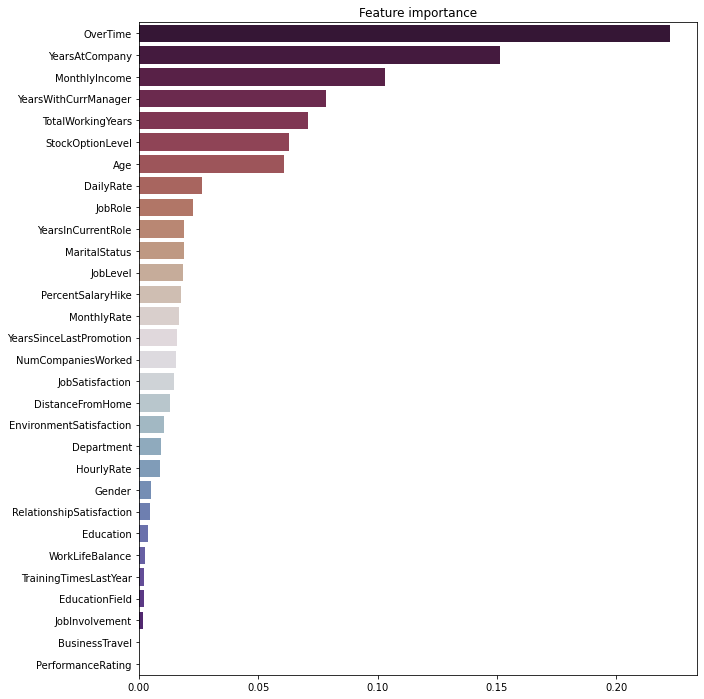

In [294]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="twilight_shifted_r", orient='h')

In [295]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
1420,41,642,1,76,1,2782.0,21412,3,22,1,...,1,0,6,3,1,0,1,1,2,0
743,59,715,2,69,4,13726.0,21829,3,13,0,...,0,2,4,3,2,1,0,1,2,0
267,25,675,5,85,2,4000.0,18384,1,12,2,...,1,3,0,1,0,0,0,3,2,0
1322,46,706,2,82,3,8578.0,19989,3,14,1,...,1,0,4,3,0,0,0,0,3,0
1281,35,303,27,84,2,5813.0,13492,1,18,0,...,1,0,7,3,2,1,0,3,2,1


In [296]:
train['Predicted']=Model.predict(x_train)
train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition,Predicted
1420,41,642,1,76,1,2782.0,21412,3,22,1,...,0,6,3,1,0,1,1,2,0,0
743,59,715,2,69,4,13726.0,21829,3,13,0,...,2,4,3,2,1,0,1,2,0,0
267,25,675,5,85,2,4000.0,18384,1,12,2,...,3,0,1,0,0,0,3,2,0,0
1322,46,706,2,82,3,8578.0,19989,3,14,1,...,0,4,3,0,0,0,0,3,0,0
1281,35,303,27,84,2,5813.0,13492,1,18,0,...,0,7,3,2,1,0,3,2,1,0


In [297]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Attrition'], train['Predicted'])
print(confusion_matrix)

[[862   0]
 [167   0]]


In [298]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       862
           1       0.00      0.00      0.00       167

    accuracy                           0.84      1029
   macro avg       0.42      0.50      0.46      1029
weighted avg       0.70      0.84      0.76      1029



In [299]:
test=pd.concat([x_test,y_test],axis=1)
test.head()


,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
1261,38,833,18,60,2,5811.0,24539,3,16,1,...,1,1,0,3,1,1,0,0,2,0
434,31,1274,9,33,3,10648.0,14394,1,25,1,...,1,0,4,2,0,0,1,3,1,0
313,33,553,5,74,3,11878.0,23364,6,11,2,...,0,0,3,2,1,0,0,2,2,0
1182,36,894,1,33,2,4374.0,15411,0,15,0,...,0,2,4,0,1,0,0,0,2,0
446,41,267,10,56,2,6230.0,13430,7,14,0,...,1,0,7,3,2,0,0,3,2,0


In [300]:
test['Predicted']=Model.predict(x_test)
test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition,Predicted
1261,38,833,18,60,2,5811.0,24539,3,16,1,...,1,0,3,1,1,0,0,2,0,0
434,31,1274,9,33,3,10648.0,14394,1,25,1,...,0,4,2,0,0,1,3,1,0,0
313,33,553,5,74,3,11878.0,23364,6,11,2,...,0,3,2,1,0,0,2,2,0,0
1182,36,894,1,33,2,4374.0,15411,0,15,0,...,2,4,0,1,0,0,0,2,0,0
446,41,267,10,56,2,6230.0,13430,7,14,0,...,0,7,3,2,0,0,3,2,0,0


In [301]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Attrition'], test['Predicted'])
print(confusion_matrix)

[[371   0]
 [ 70   0]]


In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



# Model  -GBM (Gradient boosting)






In [303]:
model_parameters = {
        'n_estimators': [10, 50, 100], # number of tress
        'max_depth': [3, 5],  # maximum branches in tree
        'min_samples_leaf': [10,15,20]  # no. of sample in  child nodes
}

In [304]:

model = GradientBoostingClassifier(random_state=10,loss="exponential",criterion="mse")

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,   
                    verbose=1, 
                    n_jobs=-1, 
                    scoring='accuracy') 

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  loss='exponential',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [305]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 50}


In [306]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=15, n_estimators=50)

In [307]:
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

# Confusion Matrix for Train Data


In [308]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[859   3]
 [ 84  83]]


In [324]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       862
           1       0.97      0.50      0.66       167

    accuracy                           0.92      1029
   macro avg       0.94      0.75      0.80      1029
weighted avg       0.92      0.92      0.90      1029



# Confusion matrix for test 

In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[365   6]
 [ 53  17]]


In [311]:

print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.93       371
           1       0.74      0.24      0.37        70

    accuracy                           0.87       441
   macro avg       0.81      0.61      0.65       441
weighted avg       0.85      0.87      0.84       441



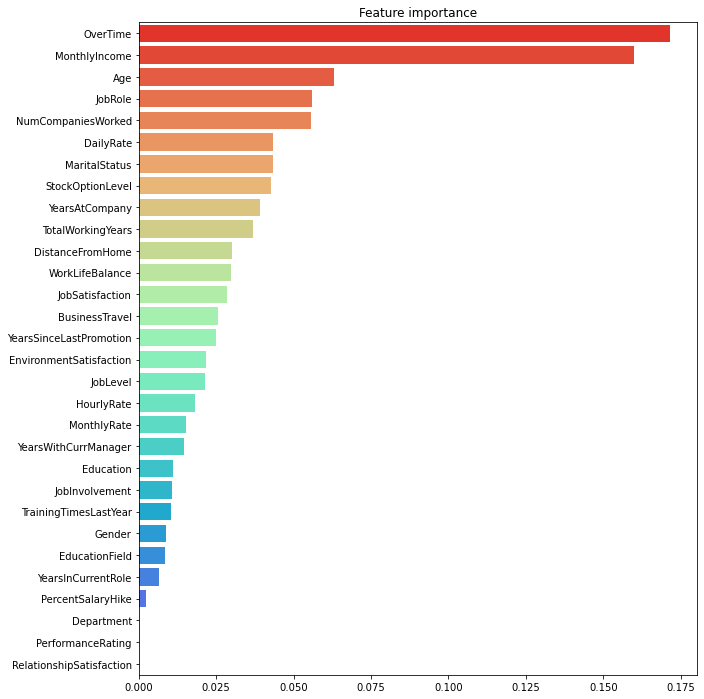

In [314]:
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="rainbow_r", orient='h')


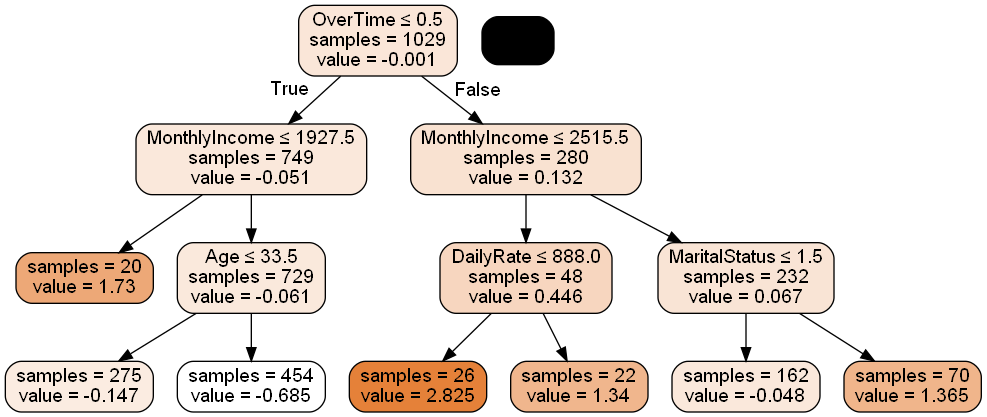

In [323]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[2, 0] #2,3,42,43
Attrition=['Yes','No']
feature_list = list(X.columns)


from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Attrition,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())